# Problem 2

In [4]:
# Setup:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

import warnings

warnings.filterwarnings("ignore")

# Fix random seed for reproducibility
np.random.seed(42)

## Example code using the `polyfit` and `Kfold` functions

Note: This section is not part of the homework problem, but provides some potentially-helpful example code regarding the usage of `numpy.polyfit`, `numpy.polyval`, and `sklearn.model_selection.KFold`.

First, let's generate some synthetic data: a quadratic function plus some Gaussian noise.

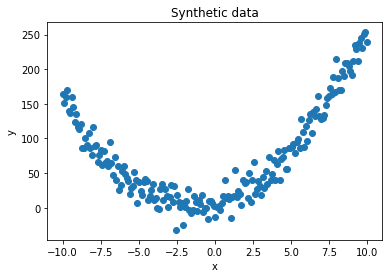

In [5]:
# Coefficients of the quadratic function, y(x) = ax^2 + bx + c:
a = 2
b = 5
c = 7

N = 200  # Number of data points
x = np.linspace(-10, 10, num=N)  # x ranges from -10 to 10
# y is the quadratic function of x specified by a, b, and c, plus noise
y = a * x**2 + b * x + c + 15 * np.random.randn(N)

# Plot the data:
plt.figure()
plt.plot(x, y, marker="o", linewidth=0)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic data")

plt.show()

Next, we'll use the `numpy.polyfit` function to fit a quadratic polynomial to this data. 
We can evaluate the resulting polynomial at arbitrary points.

We fit the following quadratic function: f(x) = 1.9895878632462736x^2 + 5.171005713857838*x + 6.7389949005592715

f(4) = 59.256423567931


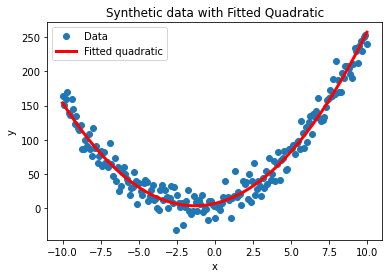

In [6]:
# Fit a degree-2 polynomial to the data:
degree = 2
coefficients = np.polyfit(x, y, degree)

# Print out the resulting quadratic function:
print(f"We fit the following quadratic function: f(x) = {coefficients[0]}x^2 + {coefficients[1]}*x + {coefficients[2]}")

# Evaluate the fitted polynomial at x = 4:
x_test = 4
f_eval = np.polyval(coefficients, x_test)
print(f"\nf({x_test}) = {f_eval}")

# Let's visualize our fitted quadratic:
plt.figure()

plt.plot(x, y, marker="o", linewidth=0)
plt.plot(x, np.polyval(coefficients, x), color="red", linewidth=3)

plt.legend(["Data", "Fitted quadratic"], loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic data with Fitted Quadratic")

plt.show()

Finally, assume that we'd like to perform 10-fold cross validation with this dataset. 
Let's divide it into training and test sets, and print out the test sets. 
To limit the amount of text that we are printing out, we'll modify the dataset to make it smaller.

In [7]:
# Coefficients of the quadratic function, y = ax^2 + bx + c:
a = 2
b = 5
c = 7

N = 80  # Number of points--fewer this time!
x = np.linspace(-10, 10, num=N)  # x ranges from -10 to 10
# y is the quadratic function of x specified by a, b, and c, plus noise
y = a * x**2 + b * x + c + 15 * np.random.randn(N)

# Initialize kfold cross-validation object with 10 folds:
num_folds = 10
kf = KFold(n_splits=num_folds)

# Iterate through cross-validation folds:
i = 1
for train_index, test_index in kf.split(x):

    # Print out test indices:
    print("Fold ", i, " of ", num_folds, " test indices:", test_index)

    # Training and testing data points for this fold:
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    i += 1

Fold  1  of  10  test indices: [0 1 2 3 4 5 6 7]
Fold  2  of  10  test indices: [ 8  9 10 11 12 13 14 15]
Fold  3  of  10  test indices: [16 17 18 19 20 21 22 23]
Fold  4  of  10  test indices: [24 25 26 27 28 29 30 31]
Fold  5  of  10  test indices: [32 33 34 35 36 37 38 39]
Fold  6  of  10  test indices: [40 41 42 43 44 45 46 47]
Fold  7  of  10  test indices: [48 49 50 51 52 53 54 55]
Fold  8  of  10  test indices: [56 57 58 59 60 61 62 63]
Fold  9  of  10  test indices: [64 65 66 67 68 69 70 71]
Fold  10  of  10  test indices: [72 73 74 75 76 77 78 79]


## Loading the Data for Problem 2

This code loads the data from `bv_data.csv` using the load_data helper function. Note that `data[:, 0]` is an array of all the $x$ values in the data and `data[:, 1]` is an array of the corresponding $y$ values.

In [8]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    Input:
        filename: given as a string.
    Output:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=",")

Write your code below for solving problem 2 part B:

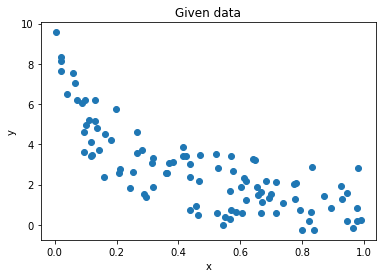

In [9]:
data = load_data("bv_data.csv")
x = data[:, 0]
y = data[:, 1]

plt.figure()
plt.plot(x, y, marker="o", linewidth=0)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Given data")

plt.show()

Degree 1 polynomial regression
Degree 2 polynomial regression
Degree 6 polynomial regression
Degree 12 polynomial regression


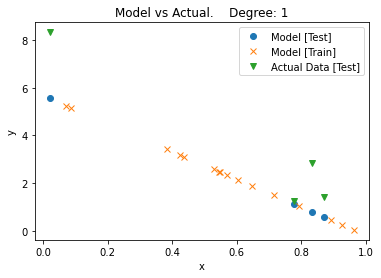

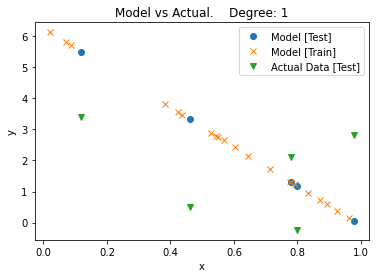

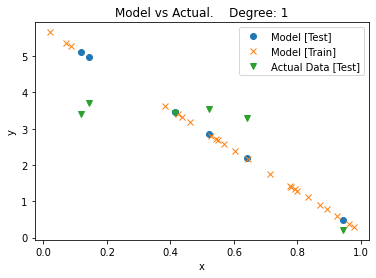

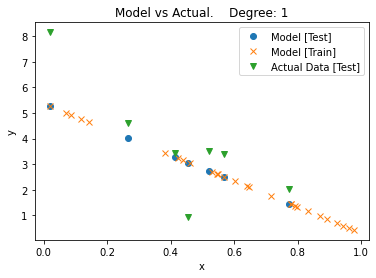

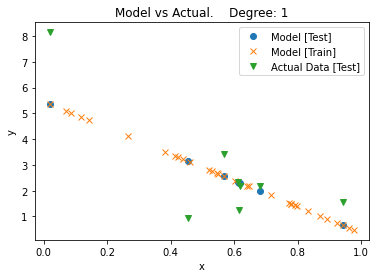

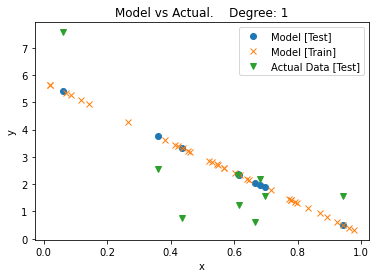

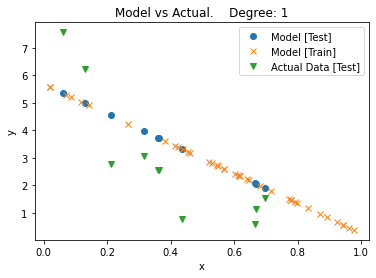

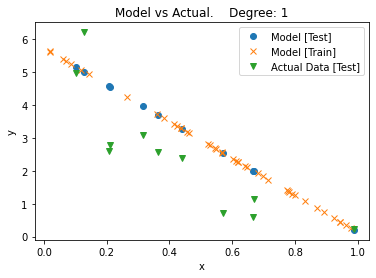

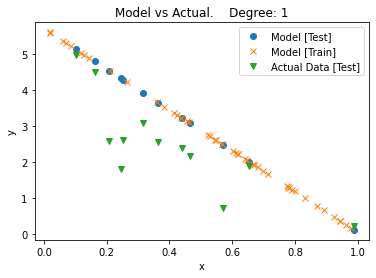

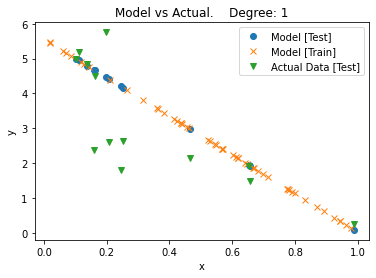

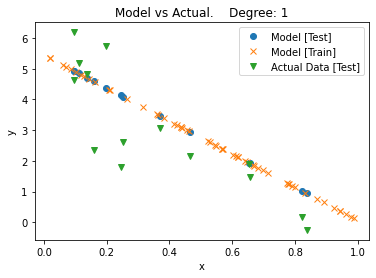

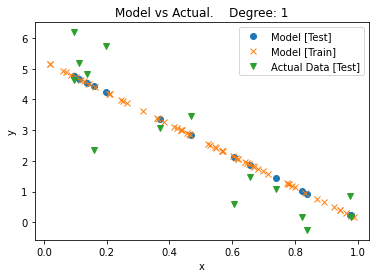

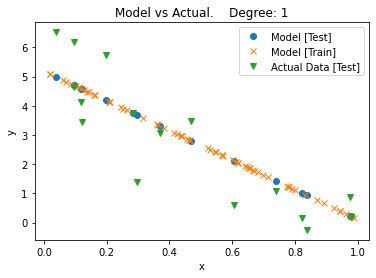

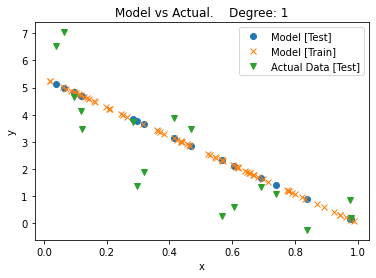

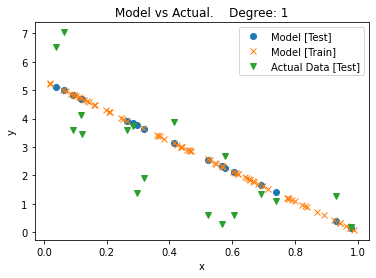

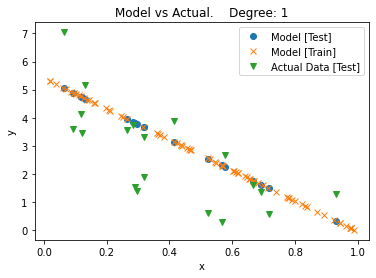

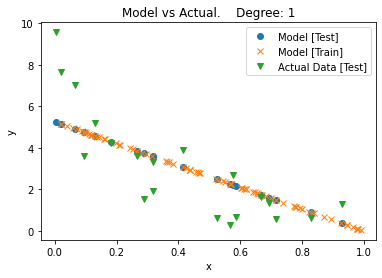

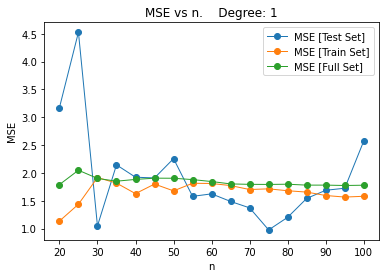

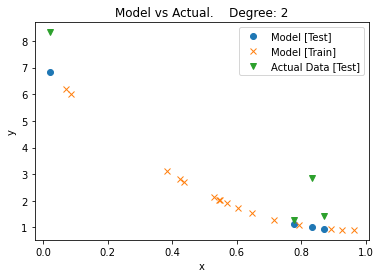

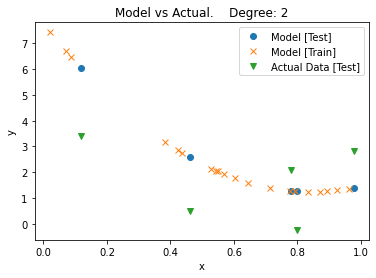

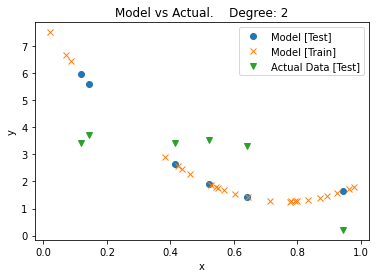

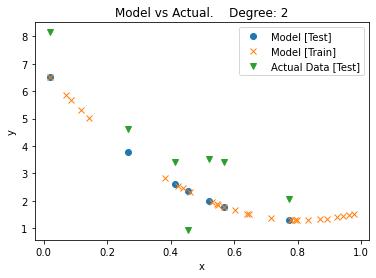

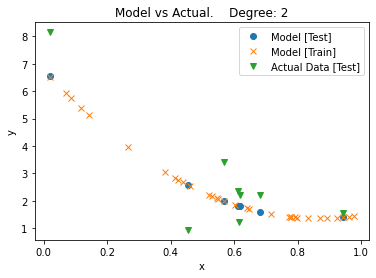

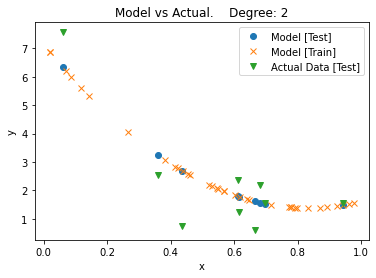

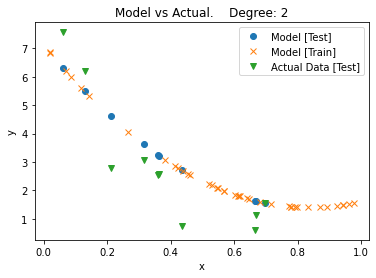

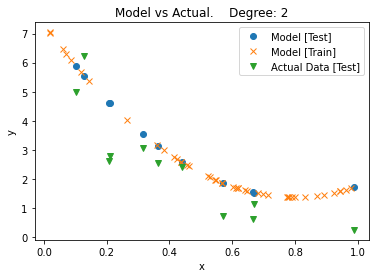

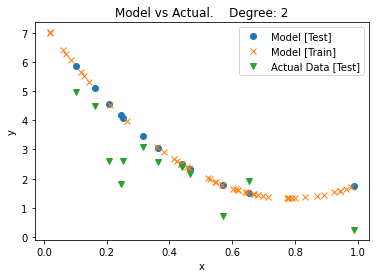

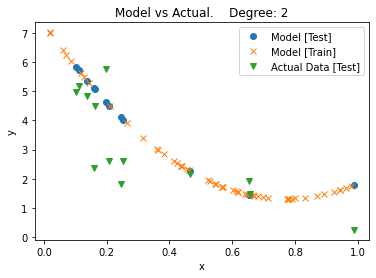

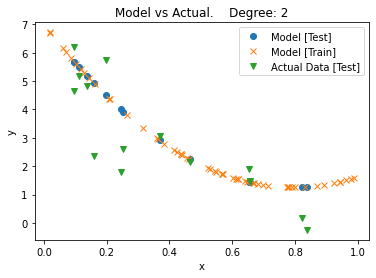

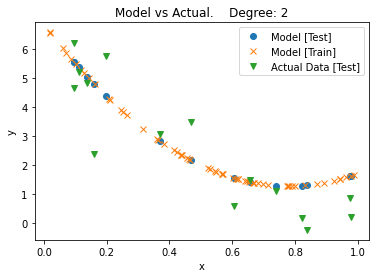

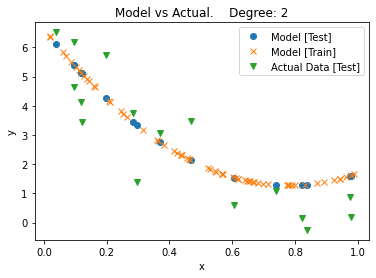

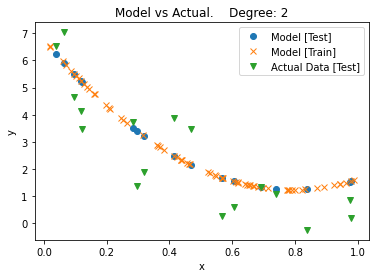

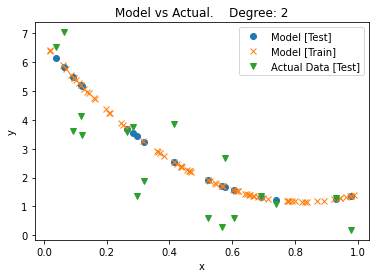

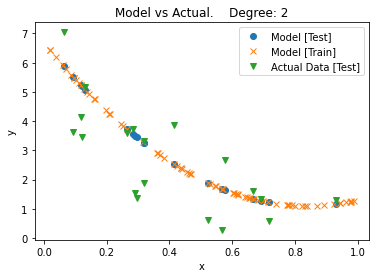

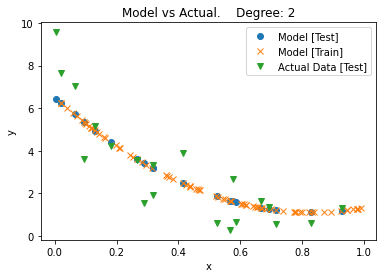

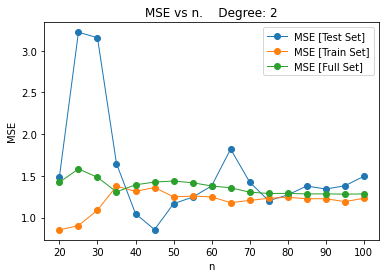

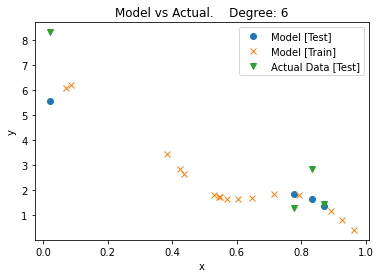

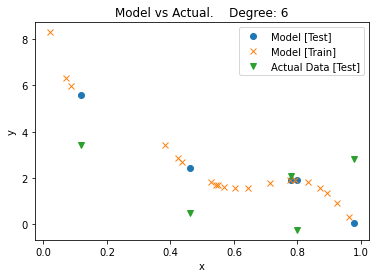

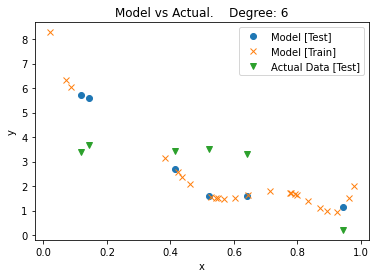

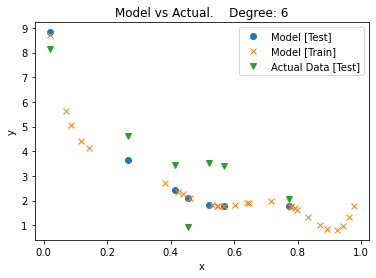

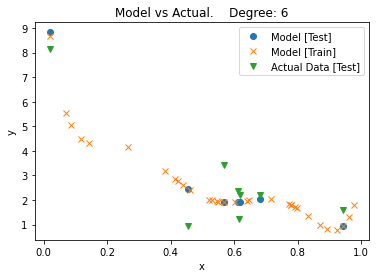

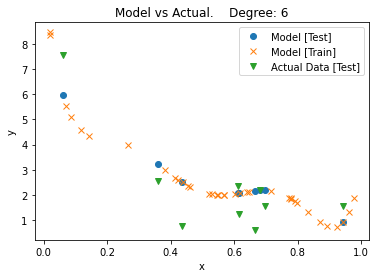

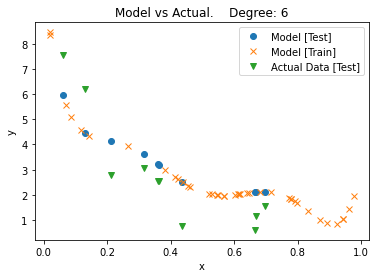

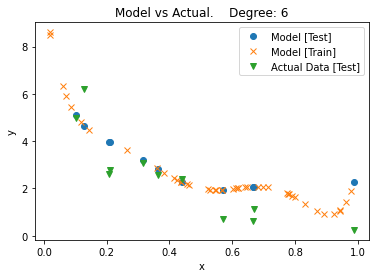

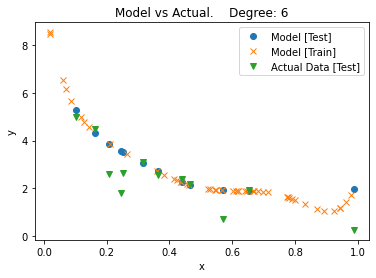

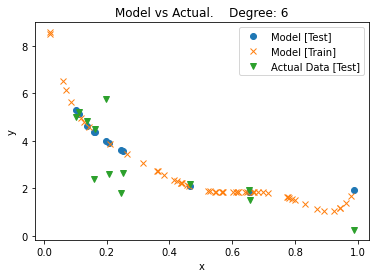

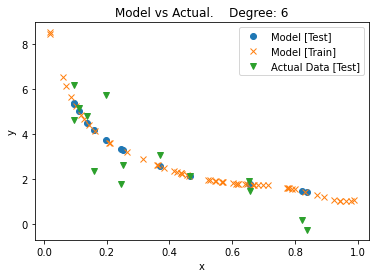

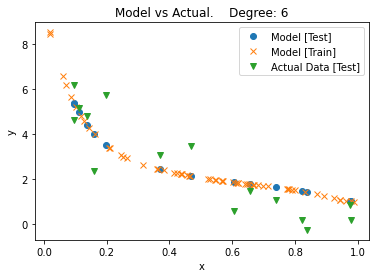

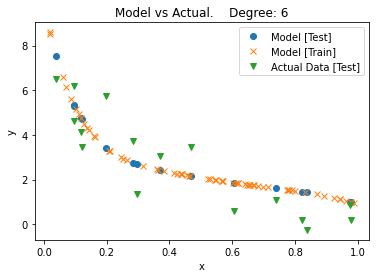

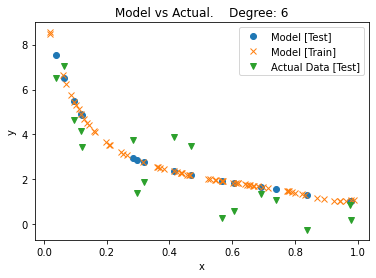

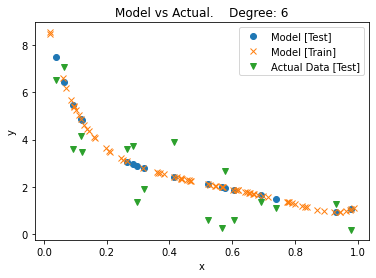

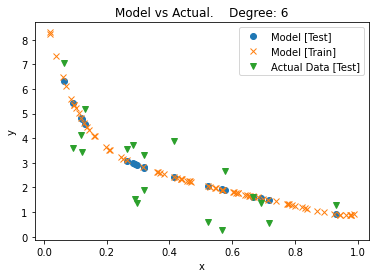

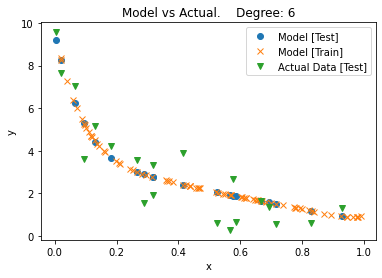

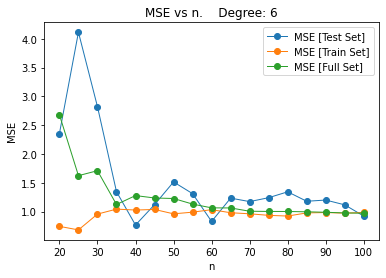

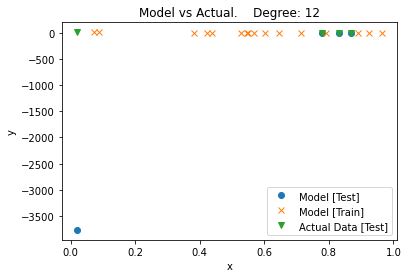

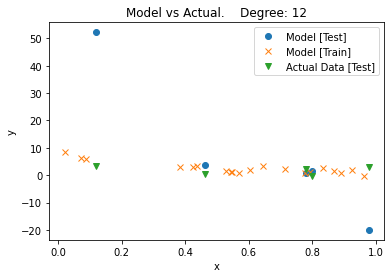

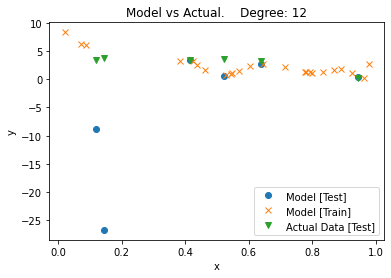

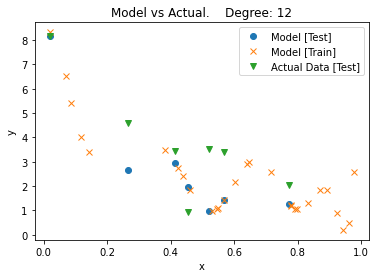

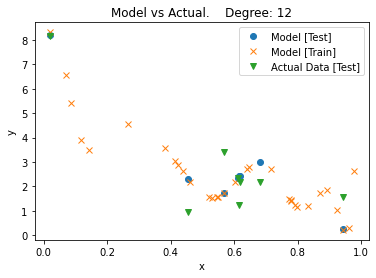

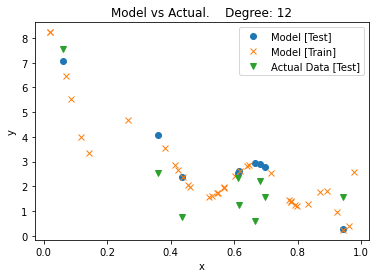

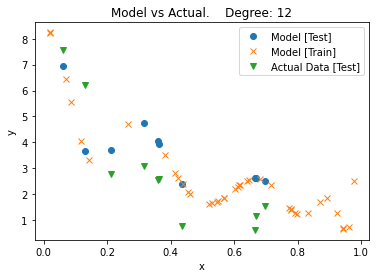

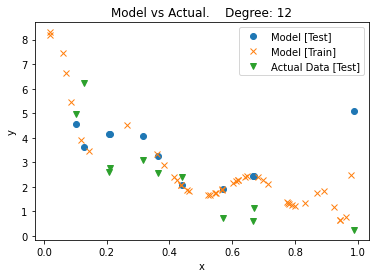

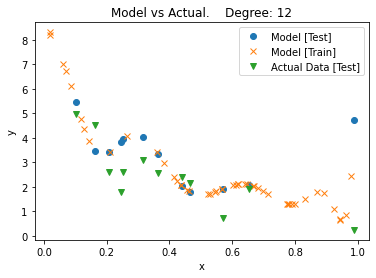

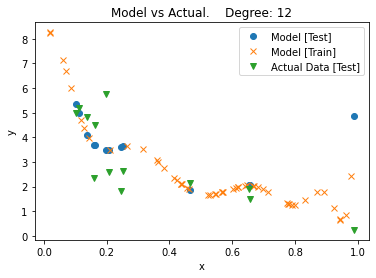

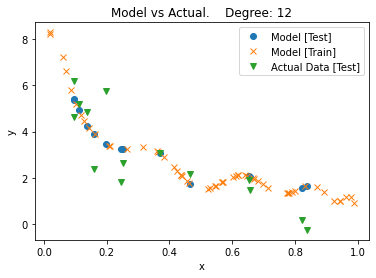

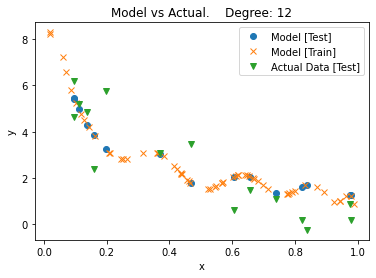

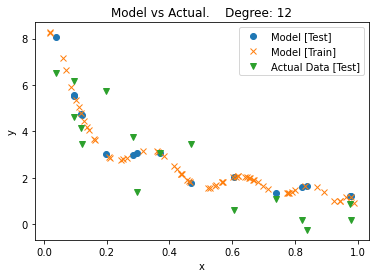

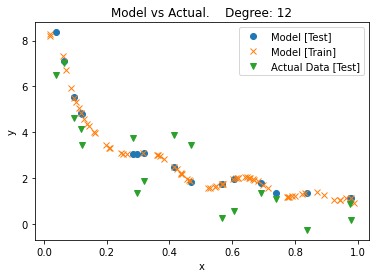

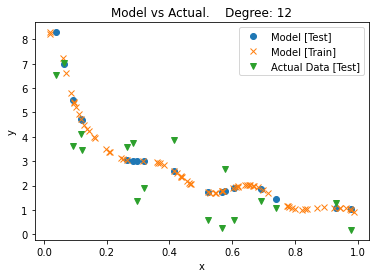

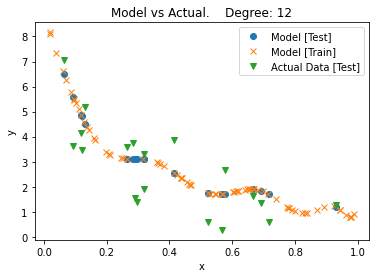

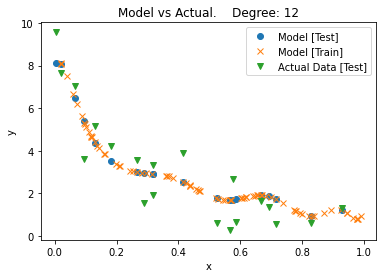

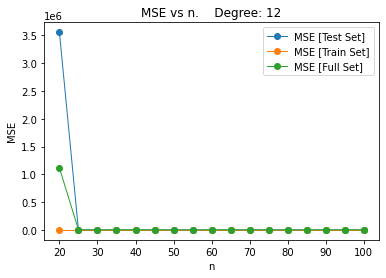

In [10]:
degree = [1,2,6,12]
N = np.arange(20,105,5)

full_test_mse_array = []
full_train_mse_array = []

# Iterating through all possible N values given in the HW
for d in degree:
    print("Degree {} polynomial regression".format(d))
#     print()
    num_folds = 5
    kf = KFold(n_splits=num_folds)
    mse_array = []
    mse_test_array = []
    mse_train_array = []

    for n in N:
#         print("N of length {}".format(n))
        x_n = x[0:n]
        y_n = y[0:n]

        i = 1
        mean_mse_train = 0
        mean_mse_test = 0
        mean_mse = 0
        
        for train_index, test_index in kf.split(x_n):
                        
            # Training and testing data points for this fold:
            x_train, x_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Model found using the training data
            coeff_dn = np.polyfit(x_train, y_train, d)
            
            # Points (y) found via model coefficients (for all testing x's)
            x_polyval_test = np.polyval(coeff_dn, x_test)
            
            # Points (y) found via model coefficients (for all training x's)
            x_polyval_train = np.polyval(coeff_dn, x_train)
            
            # Points (y) found via model coefficients (for all x's)
            x_polyval_all = np.polyval(coeff_dn, x)
            
            # MSE between test model outputs (x_polyval_test)  based off training coeffs and actual test data (y_test)
            mse_test = mean_squared_error(y_test, x_polyval_test)
            mean_mse_test += mse_test
            
            # MSE between train model outputs (x_polyval_train)  based off training coeffs and actual test data (y_test)
            mse_train = mean_squared_error(y_train, x_polyval_train)
            mean_mse_train += mse_train
            
            # MSE between d degree model output (x_polyval_all) and data outputs (y)
            mse = mean_squared_error(y, x_polyval_all) 
            mean_mse += mse
            
           

            i+=1
        
        # Appending mse from each n into array for single degree regression (d)
        mse_test_array.append(mse_test)
        mse_train_array.append(mse_train)
        mse_array.append(mse)
        
        # Plots of model outputs with coefficients trained on training set vs actual outputs
        plt.figure()
        plt.plot(x_test, x_polyval_test, marker="o", linewidth=0)
        plt.plot(x_train, x_polyval_train, marker="x", linewidth=0)
        plt.plot(x_test, y_test, marker="v", linewidth=0)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend(["Model [Test]", "Model [Train]", "Actual Data [Test]"], loc="best")
        plt.title("Model vs Actual.    Degree: {}".format(d))
    
    plt.figure()
    plt.plot(N, mse_test_array, marker = "o", linewidth = 1)
    plt.plot(N, mse_train_array, marker = "o", linewidth = 1)
    plt.plot(N, mse_array, marker = "o", linewidth = 1)
    plt.xlabel("n")
    plt.ylabel("MSE")
    plt.legend(["MSE [Test Set]", "MSE [Train Set]", "MSE [Full Set]"], loc="best")
    plt.title("MSE vs n.    Degree: {}".format(d))

Problem D [3 points]: Based on the learning curves, which polynomial regression model (i.e. which
degree polynomial) has the highest bias? How can you tell?

* From the graphs, it seems that the first order regression has the highest bias. This is because, with changes in the data, there is little change in the model. It is too simplistic to model the data

Problem E [3 points]: Which model has the highest variance? How can you tell?

* From the graphs, it looks like the 12th order polynomial has the higest variance. This is because the model will over fit and will not be able to generalize to changes in data

Problem F [3 points]: What does the learning curve of the quadratic model tell you about how much the model will improve if we had additional training points?

* It looks like there is still some reduction in the MSE nearing the end of the n-sized partitions therefore adding data sets will allow the learning curve to continue decreasing the MSE

Problem G [3 points]: Why is training error generally lower than validation error?

* This occurs due to the fact that the model was trained on the training set and will only encounter the validation/testing set only for testing and not adjustments. 

Problem H [3 points]: Based on the learning curves, which model would you expect to perform best on some unseen data drawn from the same distribution as the training data, and why?

* I would have to say that the second order regression will perform the best. The first order is too simplistic (high bias) while the 6th and 12th order regression models are too complex and will overfit the model (high variance). 
